In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from collections import Counter, OrderedDict
from sys import stderr

In [2]:
from russe.w2v.utils import load_vectors, load_word2vec_format
import pandas as pd
import re
import numpy as np
from sys import stdout, stderr

# Load word and context vectors

In [367]:
fw2v_words = '/home/ubuntu/w2v_vecs/wiki_raw.norm-sz100-w10-cb0-it1-min5.w2v'
fw2v_contexts = fw2v_words + '.contexts'
vw = load_word2vec_format(fw2v_words, binary=True, norm_only=False)
vc = load_word2vec_format(fw2v_contexts, binary=True, norm_only=False)
print vw.syn0norm.shape, vc.syn0norm.shape          

(968756, 100) (968756, 100)


# Some experiments using word vectors and context vectors for similar words

In [364]:
def get_similar(vec, word, neg=[], topn=50, mindist=None, only_letters=False, log=True):  
    res = []
    r=[(x, y) for x, y in vec.most_similar(positive=[word],negative=neg, topn=topn) if y > 0]
    for w,sim in r:
#        sim = vec.similarity(word,w)
        if (mindist is None or sim >= mindist) and (not only_letters or re_only_letters.match(w) is not None):
            if log:
                print w,sim
            res.append((w,sim))
        else:
            if log:
                print "%s %s SKIPPED (%r)" % (w,d,sim)

    return res

In [365]:
import numpy as np
def dot(w1,c1):
    return np.dot(vw.syn0norm[vw.vocab[w1].index], vc.syn0norm[vc.vocab[c1].index])
def dot1(w1,c1):
    return np.dot(vw.syn0norm[vw.vocab[w1].index], vw.syn0norm[vw.vocab[c1].index])
def logprob(word, sense):
    return 1.0 / (1.0 + np.exp(-dot1(word,sense)))

In [368]:
word = u'пирог'
from itertools import chain
r1= get_similar(vw, vw.syn0norm[vw.vocab[word].index], topn=20, log=False)
r2= get_similar(vc, vc.syn0norm[vc.vocab[word].index], topn=20, log=False)
r3= get_similar(vc, vw.syn0norm[vw.vocab[word].index], topn=20, log=False)
r4= get_similar(vw, vc.syn0norm[vc.vocab[word].index], topn=20, log=False)
for tup in zip(r1,r2,r3,r4):
    print '%15s %.2lf %15s %.2lf\t %15s %.2lf %15s %.2lf' % tuple(chain.from_iterable(tup))

          пирог 1.00           пирог 1.00	        ипохский 0.78           пирог 0.49
       цыпленок 0.84        цыпленок 0.84	  шварцвальдская 0.75             суп 0.35
            суп 0.83          пудинг 0.83	          сидром 0.75         сладкий 0.33
        шоколад 0.83         жареный 0.83	         сдобный 0.74        коктейль 0.32
         пирога 0.82             суп 0.81	      собачатины 0.73        цыпленок 0.32
        жареный 0.81          десерт 0.80	        ягнятину 0.73         печенье 0.32
         пудинг 0.81         печенье 0.79	      порезанным 0.73          десерт 0.31
       коктейль 0.81          пирога 0.79	   эпилированные 0.72        кааберма 0.30
         десерт 0.81         ветчина 0.79	    завариванием 0.72            каша 0.30
   апельсиновый 0.80         шоколад 0.78	         тэрияки 0.71         шоколад 0.30
        ветчина 0.80         варенье 0.78	        паприкой 0.71         варенье 0.30
        варенье 0.80            пунш 0.78	      ананасовым 0.71  

# Test using several sentences with different words

In [9]:
word2sents={
u'арбалет': [
    u'арбалет, как правило, превосходил обычный лук по точности стрельбы и убойной силе',
    u'для стрельбы из арбалета использовались болты — особые арбалетные стрелы',
    u'На войне использовались как ручные арбалеты, так и их увеличенные варианты, устанавливавшиеся на станках',
    u'использовавшиеся в качестве метательных машин; такие арбалеты назывались аркбалистами',
    u'Базовой частью арбалета является ложе, внутри которого крепится спусковой механизм',
    u'Наиболее древние арбалеты взводились либо поясным крюком (арбалетчик наступал ногой в стремя на конце желоба арбалета, наклонялся, зацеплял крюком тетиву',
    u'специальная защёлка не позволяла стреле выпадать из арбалета при опускании его вниз',
    u'В современных арбалетах нередко используются разнообразные прицелы (оптические, коллиматорные) и лазерные целеуказатели',
    u'В последнее время интерес к арбалету как к альтернативе огнестрельному оружию для решения некоторых специальных задач начал расти',
    u'Большим достоинством арбалета являлась и высокая точность стрельбы, сравнимая только с таковой у нарезного оружия XVII—XVIII веков'
],
u'чеснок': [
    u'Чеснок широко используется в медицине благодаря антисептическому действию',
    u'С помощью луковичек чеснок размножается вегетативно, что и используется в культуре',    
    u'Бактериальная гниль может поражать чеснок как во время вегетации, так и при хранении',        
    u'С глубокой древности чеснок выращивали в Индии, куда его завезли арии',
    u'Самые ранние известные ссылки указывают, что чеснок являлся важной частью ежедневной диеты многих египтян, также египетские рукописи этого периода включает 800 лекарственных препаратов, 22 из которых изготавливались на основе чеснока',
    u'Древнем Египте ели много лука, чеснока и лука-порея, которым им не доставало в странствиях с Моисеем',
    u'Благодаря острому вкусу чеснок широко используется во всём мире как приправа',
    u'Согласно некоторым исследованиям, чеснок обладает противовирусным действием в частности, в определённой мере помогает предотвратить грипп',
    u'Лук и чеснок токсичны для кошек и собак',
    u'Вкус и запах чеснока обусловлены наличием эфирного масла'
]}

In [35]:
# -*- coding: utf-8 -*-
import pymorphy2
import pymorphy2.tokenizers
_morph = pymorphy2.MorphAnalyzer()
import re
rr = re.compile(u'[a-zа-яё]')

def tokenize(sent):
    u"""
    Simple tokenizer - lowercases everything and tokenizes using pymorphy2, removes all punctuation tokens.
    >>> ' * '.join( tokenize(u'Для') ) == u'для'
    True
    >>> ' * '.join(tokenize(u'Для стрельбы-стрельбы, из Арбалета? использовались болты — особые Арбалетные стрелы!')) == u'для * стрельбы-стрельбы * из * арбалета * использовались * болты * особые * арбалетные * стрелы'
    True
    """

    sent = sent.lower()
    words = [x for x in pymorphy2.tokenizers.simple_word_tokenize(sent) if rr.search(x) is not None]
    return words


def has_normal_form(word, normal):
    u"""
    Returns whether the word has specified normal form.
    >>> has_normal_form(u'лейки',u'лейка')
    True
    >>> has_normal_form(u'лейки',u'лейки')
    False
    >>> has_normal_form(u'берег',u'беречь')
    True
    >>> has_normal_form(u'берег',u'берег')
    True
    """
    for p in _morph.parse(word):
        if p.normal_form==normal:
            return True
    return False

def window_it(norm, text, winsize=5):
    u"""
    Iterator over windows from text of size winsize centered at any wordform with specified normal form norm.
    """
    tokens = tokenize(text)
    for i, word in enumerate(tokens):
        if has_normal_form(word, norm):
            yield tokens[max(0,i-winsize):i], word , tokens[i+1:i+1+winsize]   
            
import doctest
doctest.testmod()

TestResults(failed=0, attempted=6)

In [41]:
for sent in word2sents[u'чеснок'][3:5]:
    print '\n', sent
    print ' * '.join(tokenize(sent))
    for l,w,r in window_it(u'чеснок', sent, winsize=5):
        print '[', ' '.join(l), ']', w, '[', ' '.join(r) ,']'


С глубокой древности чеснок выращивали в Индии, куда его завезли арии
с * глубокой * древности * чеснок * выращивали * в * индии * куда * его * завезли * арии
[ с глубокой древности ] чеснок [ выращивали в индии куда его ]

Самые ранние известные ссылки указывают, что чеснок являлся важной частью ежедневной диеты многих египтян, также египетские рукописи этого периода включает 800 лекарственных препаратов, 22 из которых изготавливались на основе чеснока
самые * ранние * известные * ссылки * указывают * что * чеснок * являлся * важной * частью * ежедневной * диеты * многих * египтян * также * египетские * рукописи * этого * периода * включает * лекарственных * препаратов * из * которых * изготавливались * на * основе * чеснока
[ ранние известные ссылки указывают что ] чеснок [ являлся важной частью ежедневной диеты ]
[ из которых изготавливались на основе ] чеснока [  ]


In [136]:
test_df = pd.DataFrame(columns=['l','w','r','y_true'])
homo = '|'.join(word2sents.keys())
for norm, sents in word2sents.iteritems():
    for sent in sents:
        for l, w, r in window_it(norm, sent, winsize=5):
            test_df = test_df.append({'l':l,'w':homo,'r':r,'y_true':norm}, ignore_index=True)
test_df

,l,w,r,y_true
0,[],чеснок|арбалет,"[широко, используется, в, медицине, благодаря]",чеснок
1,"[с, помощью, луковичек]",чеснок|арбалет,"[размножается, вегетативно, что, и, используется]",чеснок
2,"[бактериальная, гниль, может, поражать]",чеснок|арбалет,"[как, во, время, вегетации, так]",чеснок
3,"[с, глубокой, древности]",чеснок|арбалет,"[выращивали, в, индии, куда, его]",чеснок
4,"[ранние, известные, ссылки, указывают, что]",чеснок|арбалет,"[являлся, важной, частью, ежедневной, диеты]",чеснок
5,"[из, которых, изготавливались, на, основе]",чеснок|арбалет,[],чеснок
6,"[древнем, египте, ели, много, лука]",чеснок|арбалет,"[и, лука-порея, которым, им, не]",чеснок
7,"[благодаря, острому, вкусу]",чеснок|арбалет,"[широко, используется, во, всём, мире]",чеснок
8,"[согласно, некоторым, исследованиям]",чеснок|арбалет,"[обладает, противовирусным, действием, в, част...",чеснок
9,"[лук, и]",чеснок|арбалет,"[токсичны, для, кошек, и, собак]",чеснок


In [62]:
for ind, row in test_df.iterrows():
    l,r = row.l, row.r
    senses = row.w.split('|')
    words = [word for word in l+r if not np.any([has_normal_form(word,sense) for sense in senses])
             and word in vw.vocab]
    print '\n'.join( [ '%.2lf %s %.2lf %.2lf ' % 
                       (logprob(word, senses[0])-logprob(word, senses[1]), word,  
                        logprob(word, senses[0]), logprob(word, senses[1])) 
                       for word in words])
    s = 0.0
    for word in words:
        lp1, lp2 = logprob(word, senses[0]), logprob(word,senses[1])
        diff = lp1 - lp2
        if np.abs(diff) > 0.05:
            s += diff
    sense = senses[0] if s > 0.0 else senses[1]
    print '\n***** %.2lf %s *****\n' % (s, sense)
    

0.01 широко 0.63 0.62 
0.02 используется 0.63 0.60 
-0.05 в 0.57 0.62 
0.07 медицине 0.64 0.57 
-0.04 благодаря 0.56 0.60 

***** 0.07 чеснок *****

-0.06 с 0.56 0.62 
-0.04 помощью 0.59 0.63 
0.03 луковичек 0.65 0.62 
0.07 размножается 0.63 0.56 
0.07 вегетативно 0.66 0.59 
-0.03 что 0.59 0.62 
-0.04 и 0.59 0.63 
0.02 используется 0.63 0.60 

***** 0.08 чеснок *****

0.05 бактериальная 0.65 0.59 
0.07 гниль 0.68 0.61 
-0.00 может 0.61 0.61 
-0.06 поражать 0.60 0.65 
-0.02 как 0.61 0.62 
-0.05 во 0.57 0.62 
-0.04 время 0.58 0.62 
0.07 вегетации 0.64 0.57 
-0.03 так 0.61 0.64 

***** 0.14 чеснок *****

-0.06 с 0.56 0.62 
-0.02 глубокой 0.59 0.61 
0.03 древности 0.63 0.60 
0.09 выращивали 0.67 0.58 
-0.05 в 0.57 0.62 
0.01 индии 0.59 0.58 
-0.01 куда 0.58 0.60 
-0.05 его 0.57 0.62 

***** 0.03 чеснок *****

-0.02 ранние 0.57 0.59 
0.01 известные 0.56 0.55 
0.01 ссылки 0.55 0.54 
0.01 указывают 0.61 0.60 
-0.03 что 0.59 0.62 
-0.07 являлся 0.53 0.60 
-0.02 важной 0.57 0.60 
-0.03 частью 0

In [64]:
sense1, sense2 = u'чеснок', u'арбалет'
from collections import Counter
sense_cnt = Counter()
for sent in word2sents[u'чеснок']:
    words = tokenize(sent)
    words = [word for word in words if not word.startswith(sense1) and not word.startswith(sense2) 
             and word in vw.vocab]
    print '\n'.join( [ '%.2lf %s %.2lf %.2lf ' % 
                       (logprob(word, sense1)-logprob(word, sense2), word,  
                        logprob(word, sense1), logprob(word, sense2)) 
                       for word in words])
    s = 0.0
    for word in words:
        lp1, lp2 = logprob(word, sense1), logprob(word,sense2)
        diff = lp1 - lp2
        if np.abs(diff) > 0.05:
            s += diff
    sense = sense1 if s > 0.0 else sense2
    print '\n***** %.2lf %s *****\n' % (s, sense)
    sense_cnt[sense]+=1
print '\n'.join('%s %d' % x for x in sense_cnt.most_common(2))

0.01 широко 0.63 0.62 
0.02 используется 0.63 0.60 
-0.05 в 0.57 0.62 
0.07 медицине 0.64 0.57 
-0.04 благодаря 0.56 0.60 
0.01 действию 0.61 0.61 

***** 0.07 чеснок *****

-0.06 с 0.56 0.62 
-0.04 помощью 0.59 0.63 
0.03 луковичек 0.65 0.62 
0.07 размножается 0.63 0.56 
0.07 вегетативно 0.66 0.59 
-0.03 что 0.59 0.62 
-0.04 и 0.59 0.63 
0.02 используется 0.63 0.60 
-0.05 в 0.57 0.62 
0.02 культуре 0.60 0.58 

***** 0.08 чеснок *****

0.05 бактериальная 0.65 0.59 
0.07 гниль 0.68 0.61 
-0.00 может 0.61 0.61 
-0.06 поражать 0.60 0.65 
-0.02 как 0.61 0.62 
-0.05 во 0.57 0.62 
-0.04 время 0.58 0.62 
0.07 вегетации 0.64 0.57 
-0.03 так 0.61 0.64 
-0.04 и 0.59 0.63 
-0.03 при 0.57 0.60 
-0.01 хранении 0.58 0.59 

***** 0.14 чеснок *****

-0.06 с 0.56 0.62 
-0.02 глубокой 0.59 0.61 
0.03 древности 0.63 0.60 
0.09 выращивали 0.67 0.58 
-0.05 в 0.57 0.62 
0.01 индии 0.59 0.58 
-0.01 куда 0.58 0.60 
-0.05 его 0.57 0.62 
0.05 завезли 0.65 0.60 
-0.02 арии 0.56 0.58 

***** 0.08 чеснок *****

-0

# Load wikipedia

In [71]:
import codecs
word2title, title2text = dict(), dict()
with codecs.open('/mnt2/home/ubuntu/w2v/wiki_raw/wiki_raw.norm', encoding='utf8') as inp:
    for linenum, line in enumerate(inp):
        sp = line.split('\t')
        if len(sp) < 3:
            #print 'ERROR: less then 3 fields in line', linenum
            continue
        title = sp[1]
        text = ' '.join(sp[2:])
        if title in title2text:
            #print 'ERROR: duplicate title %s: SKIPPED' % title
            continue
        title2text[title] = text
        for word in tokenize(title):
            if word not in word2title:
                word2title[word]= []
            word2title[word].append(title)
    print '%d / %d lines loaded successfully' % (len(title2text), linenum)

1159848 / 1095608 lines loaded successfully


In [72]:
print len(word2title), len(title2text)

529278 1095608


In [73]:
print '\n'.join(word2title[u'замок'])

замок  ( строение ) 
замок кенигсберг
замок бальга
выборгский замок
замок
тракайский замок
шильонский замок
высокий замок  ( львов ) 
шереметевский замок
небесный замок лапута
янтарный замок
замок торон
замок  ( устройство ) 
замок кенилуэрт
замок кардифф
замок керлаверок
замок дамбартон
замок данноттар
замок сталкер
замок аркарт
стерлинг  ( замок ) 
замок слэйнс
замок дун
замок эйлен - донан
замок блэкнесс
замок танталлон
замок хантли
алник  ( замок ) 
замок орфорд
замок бунратти
замок килдрамми
замок ботвелл
замок данстаффнэйдж
замок денби
хоэншвангау  ( замок ) 
замок бамборо
замок берик
замок уоркуэрт
замок чиллингем
замок фрамлингем
замок трив
замок линдисфарн
замок итал
замок прадо
замок норем
замок эдлингем
замок эйдон
замок скарборо
замок рэдвуд
замок хелмсли
замок данстанборо
замок белси
замок форд
замок бэлликэрбери
замок термонфекин
замок каллахилл
замок трим
замок лиманех
замок клонони
замок лисмор
замок бларни
замок лохранза
замок бро
замок эннискиллен
замок нолтленд
замок

# Load WSI-ed distrib.thes.

In [81]:
import gzip

def get_cid(word, neigh):
    neigh_set = set(neigh.split())
    best_cid, best_diff = None, None
    for i, row in df[df.word==word].iterrows():
        diff_len = neigh_set.difference(set(parse_neigh(row.cluster)))
        if best_diff is None or best_diff > diff_len:
            best_cid, best_diff = row.cid, diff_len
    return best_cid

def parse_neigh(line, K=None, return_dists=False):
    neigh = [(x.split(':')[0],float(x.split(':')[1])) for x in line.split(',')]
    neigh = sorted(neigh, key=lambda x:x[1],reverse=True)
    neigh_part = neigh[:K] if K is not None else neigh
    if return_dists:
        return neigh_part
    else:
        return [x[0] for x in neigh_part]

In [75]:
FDT = '/mnt2/home/ubuntu/w2v/distrib_thes/clustered_chinesewispers/'+\
'senses-librusec-all.norm-sz500-w10-cb0-it3-min5.w2v.vocab_1100000_similar250.conv-cw-e0-N200-n200-minsize5.csv.gz'


In [89]:
sdf=pd.read_csv(FDT,sep='\t', encoding='utf8')
sdf

,word,cid,cluster,isas
0,а,24,"же:0.819351,только:0.808343,и:0.803788,так:0.7...",NaN
1,только,1,"но:0.848816,не:0.827364,даже:0.823876,а:0.8083...",NaN
2,но,4,"хотя:0.87373,даже:0.854938,только:0.848816,не:...",NaN
3,как,2,"так:0.855989,только:0.799483,а:0.778312,же:0.7...",NaN
4,же,0,"а:0.819351,только:0.796941,так:0.784254,как:0....",NaN
5,в,1,"и:0.722179,а:0.638984,же:0.611398,как:0.60565,...",NaN
6,так,3,"как:0.855989,но:0.797988,ведь:0.797744,что:0.7...",NaN
7,даже,2,"но:0.854938,хотя:0.845043,только:0.823876,не:0...",NaN
8,не,7,"но:0.845032,только:0.827364,что:0.812941,даже:...",NaN
9,еще,5,"уже:0.804491,только:0.800795,но:0.75653,теперь...",NaN


In [310]:
for i,row in sdf[sdf.word==u'лук'].iterrows():
    print row.cid
    print row.cluster, '\n'

1
луком:0.723583,порей:0.651627,репчатый:0.623072,лукпорей:0.61515,спассированный:0.61072,пропассеруйте:0.605934,морковь:0.593616,листакан:0.592142,репчат:0.591502,постдумбу:0.591257,момордику:0.591003,сельдерей:0.589614,вкусуприготовление:0.588988,фитаки:0.587822,чеснок:0.587759,пропассеровать:0.585296,полукольцами:0.583679,кявар:0.583457,сотируйте:0.582941,томатпюре:0.582271,вяндлину:0.582043,резанец:0.581563,четвертькольцами:0.58098,шинкованный:0.580476,спассированные:0.578892,чимбра:0.57824,шинкованую:0.576567,сончина:0.576276,томат:0.575134,спасерованные:0.574663,растителъное:0.574574,накарбовать:0.574269,свиноговяжий:0.574238,пассерованый:0.573559,приготовлениялук:0.573163,пассированный:0.573084,яблокамисостав:0.572932,капустысостав:0.572742,мультиварочный:0.572664,моркофь:0.572092,омтиками:0.571728,скорценер:0.571711,моталыги:0.57164,супвам:0.570813,нашинковать:0.570208,приготовлениянарежьте:0.569682,белградски:0.569397,пассеровались:0.569298,зеленьш:0.568507,приготовленияпомидо

# Select test set

In [355]:
for w in [u'лук']:
    print '******* ', w, '*******'
    for i, x in enumerate(sdf[sdf.word==w].cluster):
        print '%d)' % (i+1), ' '.join(['%s' % q for q in parse_neigh(x)])
    print ''
    print ' | '.join(word2title[w])

*******  лук *******
1) луком порей репчатый лукпорей спассированный пропассеруйте морковь листакан репчат постдумбу момордику сельдерей вкусуприготовление фитаки чеснок пропассеровать полукольцами кявар сотируйте томатпюре вяндлину резанец четвертькольцами шинкованный спассированные чимбра шинкованую сончина томат спасерованные растителъное накарбовать свиноговяжий пассерованый приготовлениялук пассированный яблокамисостав капустысостав мультиварочный моркофь омтиками скорценер моталыги супвам нашинковать приготовлениянарежьте белградски пассеровались зеленьш приготовленияпомидоры полуготовому мультиварочных приготовлениякапусту пассируем обжареный грибамипонадобится приготовлениягрибы полукружочками белокачанную вкурутую картофель тыквысостав шинкованый спассерованный нугыли пассированные запассерованные супсостав спассерованные тительном яблоксостав джусаем нашинкованный пассируют приготовлениякартофель чесноковыжималки перец тукмаса пассеровать пассеруйте ансур хрчик пассерованном 

# Load test set

In [79]:
# Load test set in format:
# <ambiguous word, wiki article title, sense of the ambiguous word in this article as it's nearest neighbours>
FTEST = '/mnt2/home/ubuntu/w2v/distrib_thes/clustered_chinesewispers/testset.csv'
tdf = pd.read_csv(FTEST, sep = ',', encoding='utf8')
tdf

,word,wiki_title,neigh
0,лук,лук ( оружие ),лука колчан тетиву колчана налучна налучием л...
1,лук,английский длинный лук,лука колчан тетиву колчана налучна налучием л...
2,лук,лук ( растение ),луком порей репчатый лукпорей спассированный ...
3,замок,замок ( строение ),замка замке замку донжон дубских дерренвейт д...
4,замок,замок кенигсберг,замка замке замку донжон дубских дерренвейт д...
5,замок,выборгский замок,замка замке замку донжон дубских дерренвейт д...
6,замок,замок ( устройство ),замком замки замков самозащелкивающийся ключ ...
7,замок,накладной замок,замком замки замков самозащелкивающийся ключ ...
8,замок,цилиндровый замок,замком замки замков самозащелкивающийся ключ в...
9,кисть,кисть ( анатомия ),кисти предплечье рука запястье предплечья лад...


In [83]:
amb_df = pd.DataFrame(columns=['l','w','r','y_true'])
for wiki_title, homo, neigh in zip(tdf.wiki_title, tdf.word, tdf.neigh):
    text = None
    for title in word2title[homo]:
        if title.strip()==wiki_title.strip():
            text = title2text[title]
            break
    if text is None:
        print 'ERROR: text not found for title: %s' % wiki_title
    cid = get_cid(homo, neigh)
    for l, w, r in window_it(homo, text, winsize=10):
        amb_df = amb_df.append({'l':l,'w':homo,'r':r,'y_true':'%s_%d' % (homo, cid)}, ignore_index=True)
print len(amb_df)

492


In [112]:
amb_df.head()

,l,w,r,y_true
0,[],лук,"[оружие, дальность, полета, стрелы, зависит, о...",лук_3
1,"[лук, оружие, дальность, полета, стрелы, завис...",лук,"[силы, натяжения, тетивы, и, погоды, в, средне...",лук_3
2,"[в, среднем, составляет, до, метров, для, небо...",лук,"[эволюционировал, в, арбалет, около, iv, в, до...",лук_3
3,"[средневековье, он, был, постепенно, вытеснен,...",лук,"[и, арбалет, использовались, наряду, с, огнест...",лук_3
4,"[длительное, время, лук, и, арбалет, использов...",лук,"[разделяются, на, простые, и, составные, но, в...",лук_3


# Build classifier

In [196]:
def build_svec(word, neigh, vw):
    neigh = parse_neigh(neigh, return_dists=False)
    nlog = []
    selected_neigh = []
    for x in neigh:
        if has_normal_form(x,word):
            nlog.append('*%s' % x)
            continue
        if x not in vw:
            nlog.append('-%s' % x)
            continue
        sense_cnt = len(sdf[sdf.word==x])
        if (sense_cnt!=1):
            nlog.append('?%ds?%s' % (sense_cnt, x) )
            continue

        nlog.append('+%s' % x)
        selected_neigh.append(x)
       
    print >> stderr, '%s (%s)' % (word, ' '.join(nlog))
    svec = np.average(vw[selected_neigh],axis=0)
    print >> stderr, ' '.join(['%s %.2lf' % p for p in vw.most_similar(positive=[svec])])
    return svec

In [162]:
'|' in u'лук|ключ'

True

In [375]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class MaxProbClf(BaseEstimator, ClassifierMixin):
    def __init__(self, sense_df, vw, vc):
        self.sense_df = sense_df
        self.vw = vw
        self.vc = vc
           
    def logprob(self, ctx, vsense):
        vc = self.vc
        vctx = vc.syn0norm[vc.vocab[ctx].index]
        return 1.0 / (1.0 + np.exp(-np.dot(vctx,vsense)))        
        
    def fit(self, X, y):
        pass
    
    
    def get_senses(self, homo, cache):
        if homo not in cache:
            sense_df = self.sense_df
            senses, svecs = [], []
            homos = homo.split('|')
            for i, row in sense_df[sense_df.word.isin(homos)].iterrows():
                sense = '%s_%d' % (row.word,row.cid) if '|' not in homo else row.word
                if senses.count(sense) > 0:
                    continue
                senses.append(sense)
                svecs.append(build_svec(row.word, row.cluster, self.vw))
            cache[homo] = (senses, svecs)
        return cache[homo]
    
    
    def predict(self, X):
        y = []
        cache = dict()
        for l, homo, r in X:
            senses, svecs = self.get_senses(homo,cache)
                
            m = []
            s = 0.0
            words = [word for word in l+r if word in self.vc and word in self.vw]
            for word in words:
                lp1, lp2 = self.logprob(word, svecs[0]), self.logprob(word,svecs[1])
                diff = lp1 - lp2
                is_relevant_ctx = (np.abs(diff) > 0.02)
                if is_relevant_ctx:
                    s += diff
                    
                m.append( '%s%.2lf %s %.2lf %.2lf ' % ('*' if is_relevant_ctx else '', lp1 - lp2, word, lp1, lp2 ) )
                    
            sense = senses[0] if s > 0.0 else senses[1]
            y.append(sense)
            m.append('>>> %.2lf %s' % (s, sense))
            print >> stderr, '\n'.join(m)
            
        return y
    
clf = MaxProbClf(sdf, vw, vc)

# Crossvalidate classifier

In [376]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split


In [377]:
#filt = (amb_df.y_pred!=amb_df.y_true)
filt = (amb_df.y_pred==amb_df.y_pred)
X_test, y_test = amb_df[filt][['l','w','r']].itertuples(index=False), amb_df[filt]['y_true']


In [378]:
from sklearn.metrics import accuracy_score
#clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

лук (*луком +порей ?2s?репчатый -лукпорей -спассированный -пропассеруйте +морковь -листакан -репчат -постдумбу -момордику +сельдерей -вкусуприготовление -фитаки +чеснок -пропассеровать +полукольцами -кявар -сотируйте -томатпюре -вяндлину -резанец -четвертькольцами -шинкованный -спассированные -чимбра -шинкованую -сончина ?2s?томат -спасерованные -растителъное -накарбовать -свиноговяжий -пассерованый -приготовлениялук -пассированный -яблокамисостав -капустысостав -мультиварочный -моркофь -омтиками -скорценер -моталыги -супвам -нашинковать -приготовлениянарежьте -белградски -пассеровались -зеленьш -приготовленияпомидоры -полуготовому -мультиварочных -приготовлениякапусту -пассируем -обжареный -грибамипонадобится -приготовлениягрибы -полукружочками -белокачанную -вкурутую +картофель -тыквысостав -шинкованый -спассерованный -нугыли -пассированные -запассерованные -супсостав -спассерованные -тительном -яблоксостав -джусаем -нашинкованный -пассируют -приготовлениякартофель -чесноковыжималки 

In [379]:
print len(y_pred), len(y_test)
print acc

492 492
0.839430894309


In [372]:
amb_df['y_pred'] = y_pred


In [297]:
amb_df[filt]

,l,w,r,y_true,y_pred
0,[],лук,"[оружие, дальность, полета, стрелы, зависит, о...",лук_3,лук_3
1,"[лук, оружие, дальность, полета, стрелы, завис...",лук,"[силы, натяжения, тетивы, и, погоды, в, средне...",лук_3,лук_3
2,"[в, среднем, составляет, до, метров, для, небо...",лук,"[эволюционировал, в, арбалет, около, iv, в, до...",лук_3,лук_3
3,"[средневековье, он, был, постепенно, вытеснен,...",лук,"[и, арбалет, использовались, наряду, с, огнест...",лук_3,лук_3
4,"[длительное, время, лук, и, арбалет, использов...",лук,"[разделяются, на, простые, и, составные, но, в...",лук_3,лук_3
5,"[длиной, до, м, максимальная, известная, длина...",лук,"[были, короче, изготовляются, из, разных, мате...",лук_3,лук_1
6,"[сухожилий, животных, наружная, часть, благода...",лук,"[достигается, необходимая, гибкость, упругость...",лук_3,лук_3
7,"[клея, на, растительной, основе, для, закрепле...",лук,"[и, стрелы, также, известны, из, свидерской, к...",лук_3,лук_3
8,"[австралия, и, океания, невозможно, утверждать...",лук,"[вероятно, его, употреблению, для, метания, ст...",лук_3,лук_1
9,"[известны, находки, датируемые, примерно, тыся...",лук,"[но, по, качеству, дерева, заведомо, негодные,...",лук_3,лук_3


[[ 17   0   0   0   0   0]
 [  0  77   0   0  33   0]
 [  0   0   5   0   0   0]
 [  0   0  31 146   0   0]
 [  0   5   0   0 117   0]
 [ 21   0   0   0   0  40]]


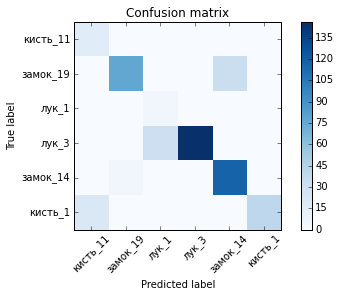

In [299]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, labels, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = [x for x in set(y_test).union(y_pred)]
cm = confusion_matrix(y_test,y_pred, labels)
print cm
plot_confusion_matrix(cm, labels)

In [302]:
amb_df.y_true.value_counts()

лук_3       177
замок_14    122
замок_19    110
кисть_1      61
кисть_11     17
лук_1         5
Name: y_true, dtype: int64

# Some senses had too few neighbours - fix it!

In [240]:
sdf.loc[(sdf.word==u'кисть') & (sdf.cid==1),'cluster']

5318    кистью:0.708289,кисточку:0.563595,окунутую:0.5...
Name: cluster, dtype: object

In [241]:
print sdf[sdf.word==u'кисточку'].iloc[1,2]
print sdf[sdf.word==u'кисть'].iloc[0,2]
sdf.loc[(sdf.word==u'кисть') & (sdf.cid==1),'cluster']=sdf[sdf.word==u'кисточку'].iloc[1,2]

кисточкой:0.699713,кисточки:0.698518,кисточка:0.671356,кисточке:0.595419,яркорозовую:0.595132,судзури:0.594297,щеточку:0.590126,кисточек:0.589635,виридоновую:0.569148,кисть:0.563596,краску:0.563562,малярную:0.562386,тушь:0.553989,тушью:0.552875,кистью:0.54739,тюбик:0.546581,вкрапьте:0.546268,колонковые:0.542238,гуашью:0.541282,мазюкала:0.540057,гуашевые:0.538673,обмакнутой:0.537962,несмывающуюся:0.537558,грунтованную:0.537441,свежеразведенными:0.534431,гуашь:0.533829,лондаколор:0.533653,ализариновый:0.531805,колонковую:0.531141,обмокнутой:0.525584,помаду:0.525559,прокрасил:0.523933,гуашевыми:0.523594,раскрашивавший:0.523245,растушевку:0.522525,краски:0.520624,мастехином:0.520361,тюбика:0.519896,декупажный:0.519324,декупажным:0.517569,кракелюрным:0.517188,примакиванием:0.515917,муштабеля:0.515831,кракелюрный:0.515083,гуашевую:0.514186,растушуй:0.51387,тушевый:0.513725,мастихинов:0.513051,акриловую:0.511473,набелила:0.510825,кярккяйнен:0.509943,флейца:0.509878,ячейчатой:0.508686,негрунто

In [244]:
build_svec(u'кисть',sdf[sdf.word==u'кисть'].iloc[0,2],vw)

кисть (?2s?кисточкой +кисточки ?3s?кисточка -кисточке -яркорозовую -судзури -щеточку ?2s?кисточек -виридоновую *кисть +краску -малярную +тушь ?2s?тушью *кистью +тюбик -вкрапьте ?3s?колонковые +гуашью -мазюкала -гуашевые -обмакнутой -несмывающуюся -грунтованную -свежеразведенными +гуашь -лондаколор ?0s?ализариновый -колонковую -обмокнутой +помаду -прокрасил -гуашевыми -раскрашивавший -растушевку +краски -мастехином +тюбика -декупажный -декупажным -кракелюрным -примакиванием -муштабеля -кракелюрный -гуашевую -растушуй -тушевый -мастихинов -акриловую -набелила -кярккяйнен -флейца -ячейчатой -негрунтованный +палитру -незавинченный -протечной -напудривания -суперстойкой ?0s?рапидографа -вывинчивающемся -загрунтовала -урзолом -брасматика -негрунтованных -тушница -китори -загрунтованному -макловицу -грунтованный +гуаши -сурмилами -нитковдеватель -ализариновым -гуашевой -дьюлакс +мастихин -кохиноровские -отшелушивающуюся -атолана -флейц -шпахтель -лессировал -растушевками -ватманскую -накрашив

array([ 0.04870818, -0.06595609, -0.13364105, -0.25355247, -0.14769123,
       -0.40074131, -0.253939  ,  0.05690258, -0.38558605, -0.23060663,
        0.13673571,  0.08906996, -0.1796204 , -0.15143546,  0.16404615,
        0.0680403 ,  0.2291836 ,  0.04031338, -0.26880845,  0.17756492,
        0.1068607 ,  0.22284994, -0.10388308,  0.41792715, -0.04218358,
       -0.30936483,  0.27533716,  0.05702191,  0.18315838, -0.16527854,
        0.2093592 , -0.01515839, -0.04215284, -0.43077862,  0.28955102,
        0.15190177,  0.26569685,  0.07637476, -0.27612075, -0.26842737,
       -0.26028225, -0.08690955, -0.0225449 ,  0.01404315, -0.24001408,
        0.08485724, -0.07682315,  0.1545288 , -0.0076282 ,  0.04497413,
        0.03887282, -0.19708854,  0.39921716,  0.29482621, -0.12212853,
       -0.27885017, -0.24005519, -0.00209733,  0.00369306,  0.07781232,
        0.00075392,  0.24484724,  0.40167299,  0.26376283, -0.08022945,
        0.14734888,  0.32226074,  0.09973601, -0.12885466, -0.02

In [ ]:
cross_validation.cross_val_score?

In [ ]:
scores = cross_validation.cross_val_score(clf, X, y, scoring='accuracy', cv=10)

In [ ]:
scores